In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from PIL import Image

In [2]:
def rgb2gray(rgb):
 return np.dot(rgb[...,:3], [0.2989, 0.5870,0.1140]).astype(np.uint8)
 

In [3]:
def lbp(image):
 height, width = image.shape 
 lbp_image = np.zeros((height, width), dtype=np.uint8)
 lbp_values = np.zeros((height - 2, width - 2), dtype=np.uint8)
 offsets = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1,-1), (0, -1)] 
 for y in range(1, height - 1): 
     for x in range(1, width - 1):
         center = image[y, x]
         binary_string = '' 
         for dy, dx in offsets:
             neighbor = image[y + dy, x + dx] 
             binary_string += '1' if neighbor >= center else '0'
             lbp_value = int(binary_string, 2) 
             lbp_image[y, x] = lbp_value
             lbp_values[y - 1, x - 1] = lbp_value 

 return lbp_image, lbp_values

LBP Values:
[[ 62  60 124 ... 241 241 241]
 [127  62 126 ... 255 255 255]
 [ 62  62  50 ... 255 255 255]
 ...
 [247 251 232 ... 255 255 255]
 [231 255 252 ... 255 255 255]
 [199 255 124 ... 255 255 255]]


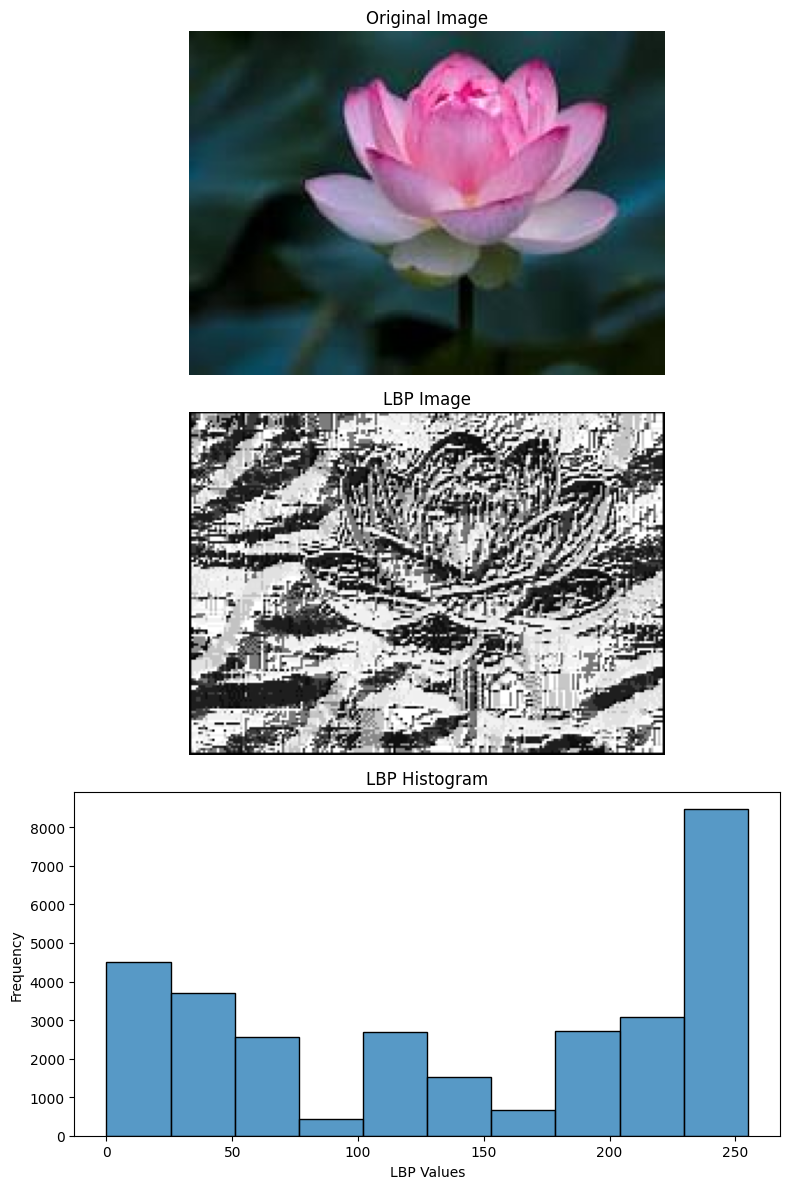

In [4]:

image_path = "download.jpeg" 
img = Image.open(image_path)
img = np.asarray(img)
gray_image = rgb2gray(img)
lbp_image, lbp_values = lbp(gray_image)
print("LBP Values:")
print(lbp_values)
lbp_image_scaled = lbp_image.astype(np.float32) / np.max(lbp_image) 
plt.figure(figsize=(8, 12)) 
plt.subplot(3, 1, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')
plt.subplot(3, 1, 2)
plt.title('LBP Image')
plt.imshow(lbp_image_scaled, cmap='gray')
plt.axis('off')
plt.subplot(3, 1, 3)
plt.title('LBP Histogram')
sns.histplot(lbp_image.reshape(-1), bins=10, kde=False)
plt.xlabel('LBP Values')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()